<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/salary-prediction-polynomial-regression/blob/main/polynomial_salary_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [2]:
data = pd.read_csv('/content/Position_Salaries.csv')
data.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
print(data.shape)
print(data.columns)
print(data['Level'])

(10, 3)
Index(['Position', 'Level', 'Salary'], dtype='object')
0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64


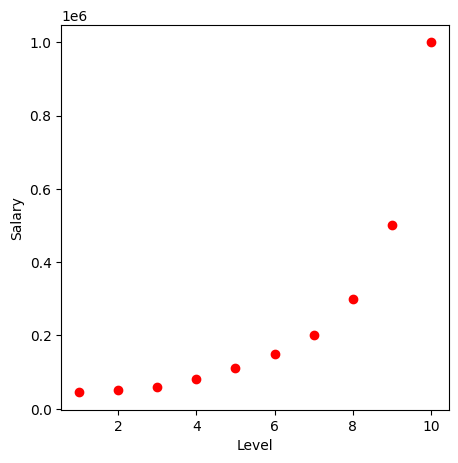

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(data['Level'], data['Salary'], c='r')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

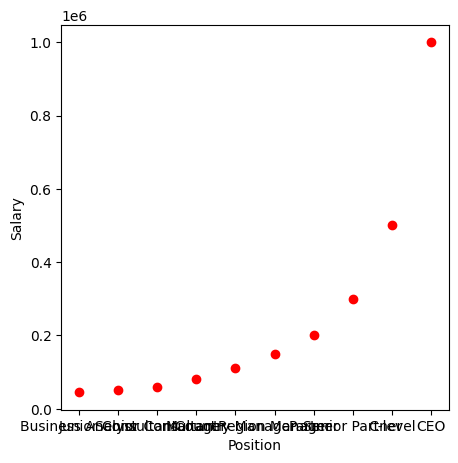

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(data['Position'], data['Salary'], c='r')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [6]:
print(data.info)

<bound method DataFrame.info of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>


In [7]:
data.drop(['Position'], axis=1)

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [8]:
X = data.drop(['Salary', 'Position'], axis=1)
y = data['Salary']
print(X)
print(y.shape)

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
(10,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [10]:
print(X_train)
print(y_train)

   Level
5      6
0      1
7      8
2      3
9     10
4      5
3      4
6      7
5     150000
0      45000
7     300000
2      60000
9    1000000
4     110000
3      80000
6     200000
Name: Salary, dtype: int64


In [11]:
model = Sequential(
    [
    tf.keras.Input(shape=(1,)),
    Dense(64, activation='linear', name='L1'),
    Dense(32, activation='linear', name='L2'),
    Dense(1, activation='linear', name='L3')
], name='my_model');

In [12]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
type(X_train)

X_train_new = X_train.to_numpy()
y_train_new = y_train.to_numpy()
X_test_new = X_test.to_numpy()
y_test_new = y_test.to_numpy()

In [23]:
x_sc = StandardScaler()
X_train_scaled = x_sc.fit_transform(X_train_new.reshape(-1,1))
X_test_scaled = x_sc.transform(X_test_new.reshape(-1,1))

y_sc = StandardScaler()
y_train_scaled = y_sc.fit_transform(y_train_new.reshape(-1,1))
y_test_scaled = y_sc.transform(y_test_new.reshape(-1,1))

In [24]:
model.compile(
    loss = tf.keras.losses.MSE,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
)

In [25]:
model.fit(X_train_scaled, y_train_scaled, epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.3634
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3819
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3893
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3776
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3637
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3771
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3717
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3634
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3689
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3720
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3666
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3634
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3667
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3687
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.3657
Epoch 16/200
1/1 ━━━━

In [30]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [31]:
print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

0.6366049172345172
0.8451296946086784


In [32]:
print(mean_squared_error(y_train_scaled, y_train_pred))
print(mean_squared_error(y_test_scaled, y_test_pred))

0.3633950827654828
0.08912646849548747
